In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [33]:
df=pd.read_csv('/content/DengueRisk_[Encoded] (1).csv')

In [34]:
display(df.head())

,YearWeek,WeekStartDate,WeekEndDate,Cases,temp_mean_C,temp_max_C,temp_min_C,precipitation_sum (mm),rain_sum (mm),sunshine_duration (s),...,District_matale,District_matara,District_monaragala,District_mullaitivu,District_nuwara eliya,District_polonnaruwa,District_puttalam,District_ratnapura,District_trincomalee,District_vavuniya
0,2022-W01,2022-01-03,2022-01-09,8,24.486,28.9,21.7,50.8,50.8,206686.56,...,0,0,0,0,0,0,0,0,0,0
1,2022-W01,2022-01-03,2022-01-09,12,24.971,29.9,21.9,14.1,14.1,255617.67,...,0,0,0,0,0,0,0,0,0,0
2,2022-W01,2022-01-03,2022-01-09,64,21.100,24.9,18.0,78.1,78.1,179577.35,...,0,0,0,0,0,0,0,0,0,0
3,2022-W01,2022-01-03,2022-01-09,26,25.314,28.2,23.1,67.1,67.1,237101.87,...,0,0,0,0,0,0,0,0,0,0
4,2022-W01,2022-01-03,2022-01-09,563,26.214,32.0,22.8,27.9,27.9,245154.69,...,0,0,0,0,0,0,0,0,0,0


In [35]:
display(df.columns)

Index(['YearWeek', 'WeekStartDate', 'WeekEndDate', 'Cases', 'temp_mean_C',
       'temp_max_C', 'temp_min_C', 'precipitation_sum (mm)', 'rain_sum (mm)',
       'sunshine_duration (s)', 'daylight_duration (s)',
       'wind_speed_10m_max (km/h)', 'et0_fao_evapotranspiration (mm)',
       'District_ampara', 'District_anuradhapura', 'District_badulla',
       'District_batticaloa', 'District_colombo', 'District_galle',
       'District_gampaha', 'District_hambantota', 'District_jaffna',
       'District_kalmunai', 'District_kalutara', 'District_kandy',
       'District_kegalle', 'District_kilinochchi', 'District_kurunegala',
       'District_mannar', 'District_matale', 'District_matara',
       'District_monaragala', 'District_mullaitivu', 'District_nuwara eliya',
       'District_polonnaruwa', 'District_puttalam', 'District_ratnapura',
       'District_trincomalee', 'District_vavuniya'],
      dtype='object')

In [38]:
df['sunshine_duration (h)'] = df['sunshine_duration (s)'] / 3600
df['daylight_duration (h)'] = df['daylight_duration (s)'] / 3600
df.drop(['sunshine_duration (s)', 'daylight_duration (s)'], axis=1, inplace=True)
print(df[['sunshine_duration (h)', 'daylight_duration (h)']].head())

   sunshine_duration (h)  daylight_duration (h)
0              57.412933              82.023047
1              71.004908              81.609964
2              49.882597              82.132894
3              65.861631              81.858042
4              68.098525              82.160333


In [40]:
 num_features= ['temp_mean_C', 'temp_max_C', 'temp_min_C',
                'rain_sum (mm)', 'sunshine_duration (h)', 'daylight_duration (h)',
                'wind_speed_10m_max (km/h)', 'et0_fao_evapotranspiration (mm)']

In [41]:
# Keep a copy before outlier capping
df_before_outliers = df.copy()

#  IQR
for feature in num_features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count outliers
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    print(f"{feature}: {outliers.shape[0]} outliers capped")

    # Winsorize (cap values to bounds)
    df[feature] = df[feature].clip(lower=lower_bound, upper=upper_bound)

temp_mean_C: 210 outliers capped
temp_max_C: 195 outliers capped
temp_min_C: 249 outliers capped
rain_sum (mm): 209 outliers capped
sunshine_duration (h): 71 outliers capped
daylight_duration (h): 0 outliers capped
wind_speed_10m_max (km/h): 84 outliers capped
et0_fao_evapotranspiration (mm): 17 outliers capped


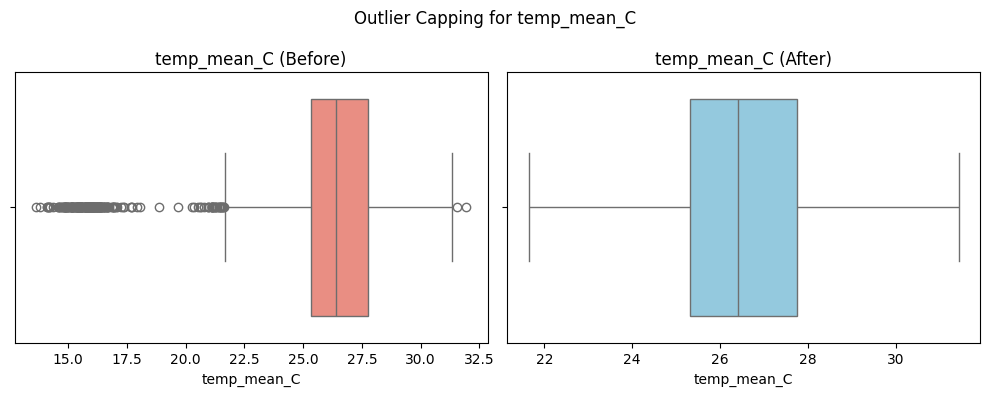

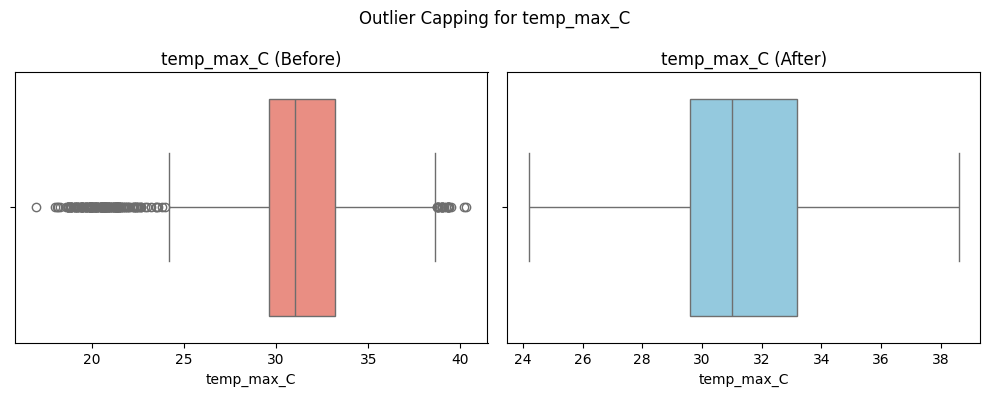

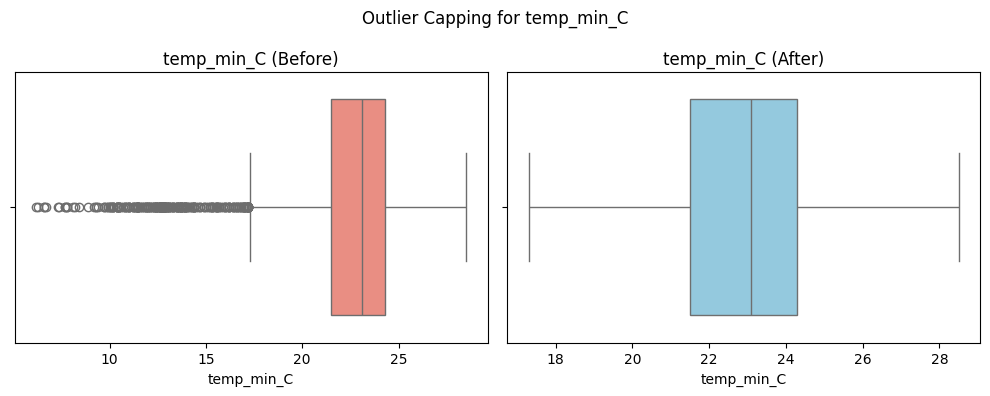

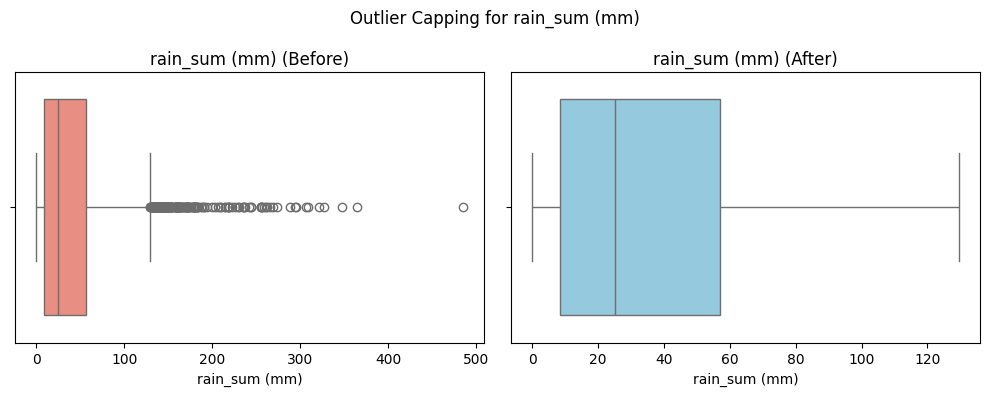

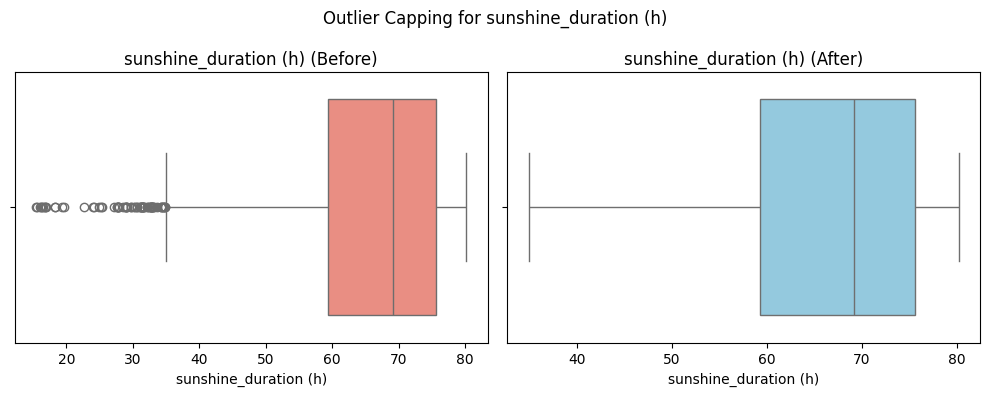

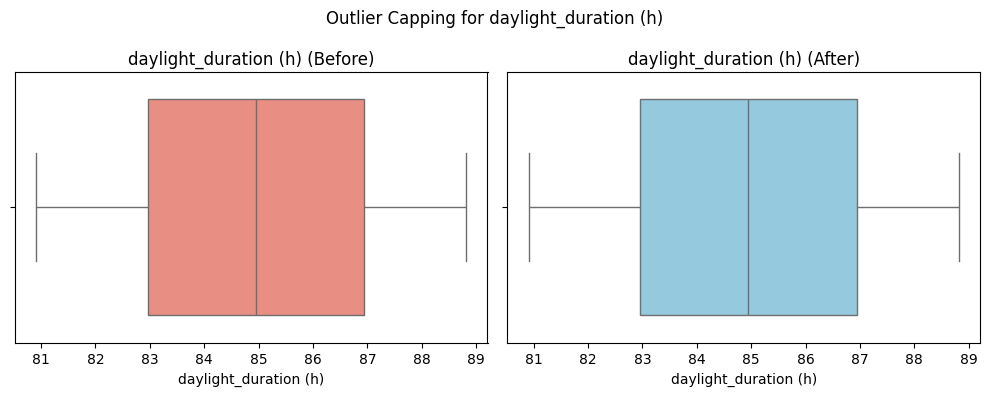

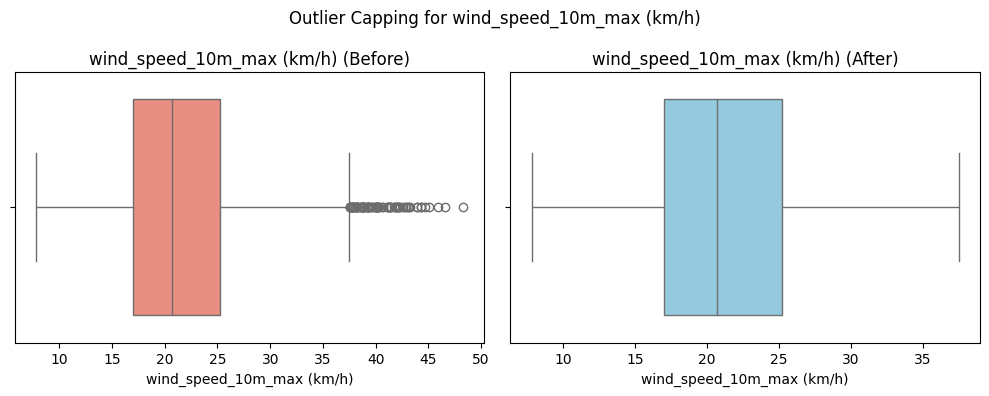

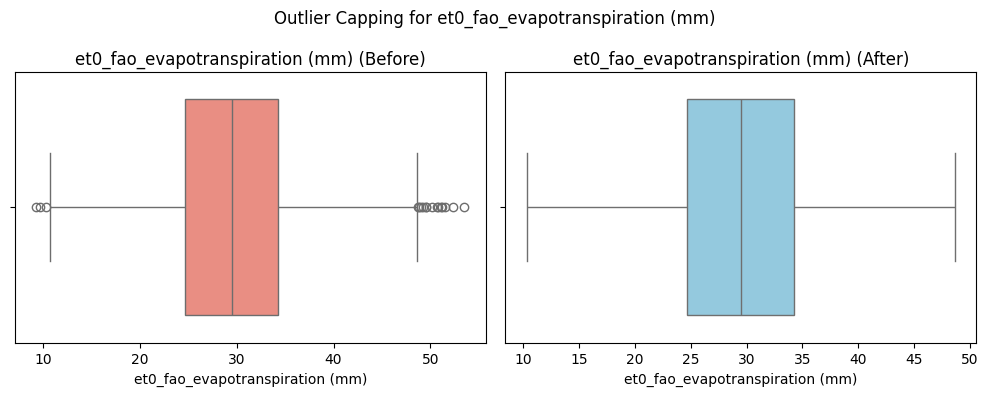

In [43]:

for feature in num_features:
    fig, ax = plt.subplots(1, 2, figsize=(10, 4))

    # Before capping
    sns.boxplot(x=df_before_outliers[feature], ax=ax[0], color="salmon")
    ax[0].set_title(f"{feature} (Before)")

    # After capping
    sns.boxplot(x=df[feature], ax=ax[1], color="skyblue")
    ax[1].set_title(f"{feature} (After)")

    plt.suptitle(f"Outlier Capping for {feature}", fontsize=12)
    plt.tight_layout()
    plt.show()

In [44]:
df.to_csv('DengueRisk_[outlier capped].csv', index=False)